In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import data
df = pd.read_csv(r'C:\Users\yousuf\source\DataAnalysisProjects\Mall_CustomerSegmentation\Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Checking for missing values
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Univariate Analysis

#### Exploring statistical analysis using single variable, so that the main purpose is to summarize/describe/find patterns within the single variable.

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


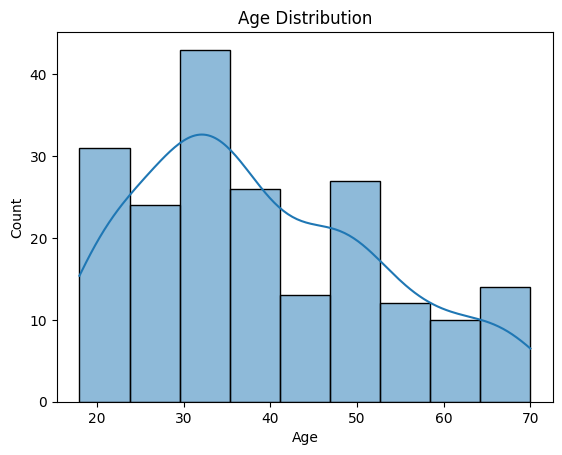

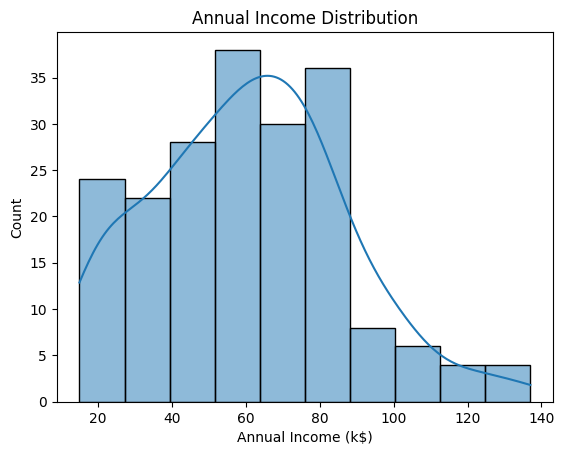

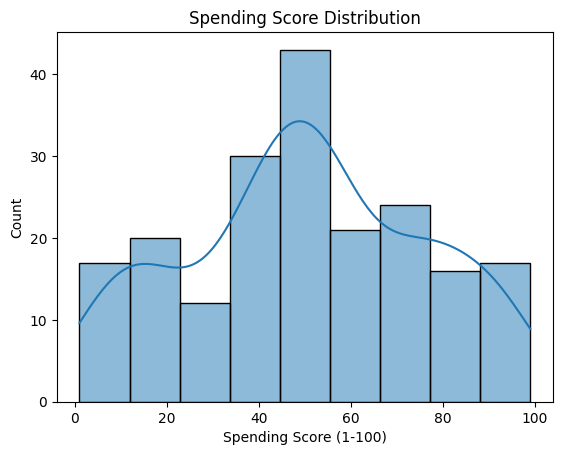

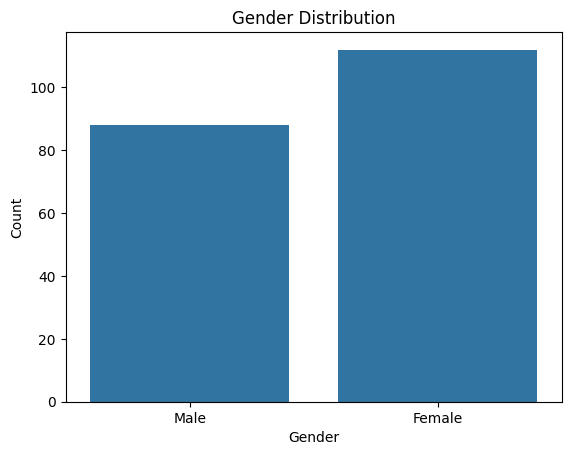

In [7]:
# Creating a dictionary for mapping each columns to its respective titles
column_titles = {
    'Age': 'Age Distribution',
    'Annual Income (k$)': 'Annual Income Distribution',
    'Spending Score (1-100)': 'Spending Score Distribution',
    'Gender': 'Gender Distribution'
}
for col, title in column_titles.items():
    plt.figure()
    if col == 'Gender':
        sns.countplot(x=col, data=df)  
    else:
        sns.histplot(df[col], kde=True)
    plt.title(title)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

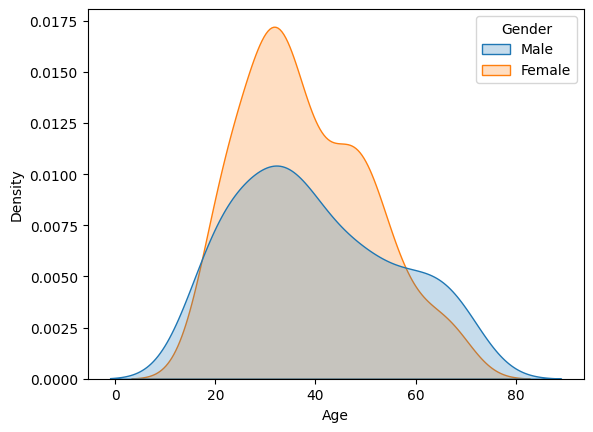

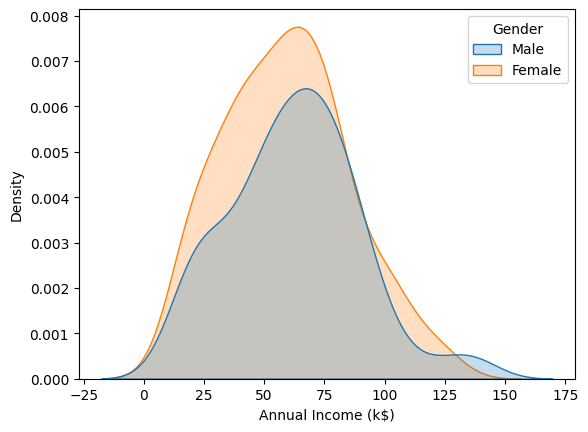

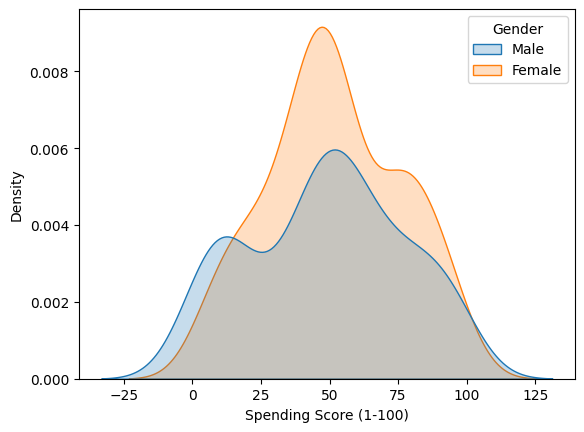

In [8]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for cols in columns:
    plt.figure()
    sns.kdeplot(data=df, x=cols, shade=True, hue='Gender')
    plt.show()

## Deeper Analysis using boxplot

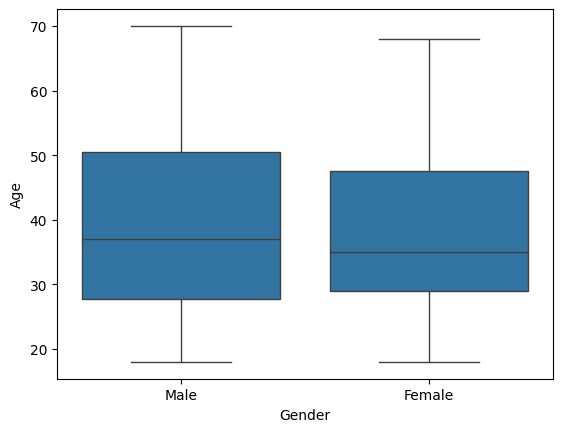

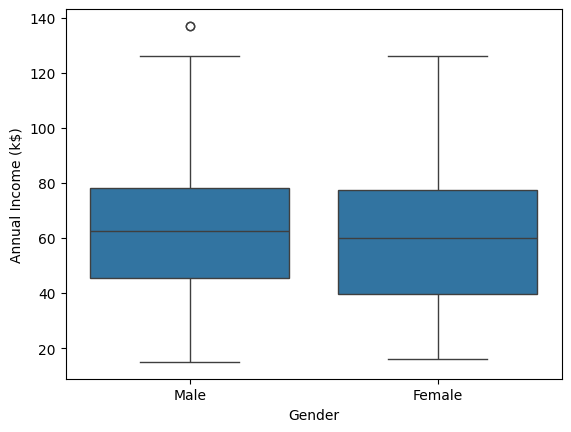

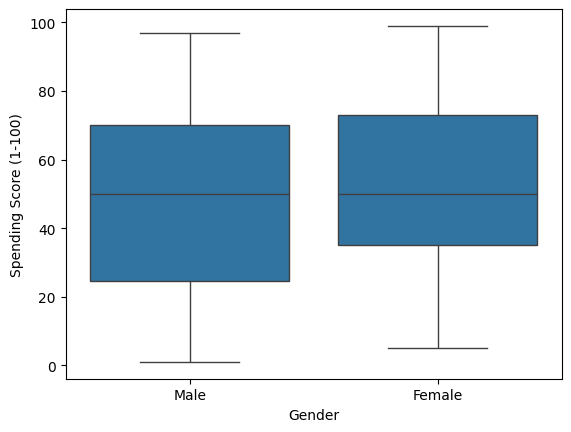

In [9]:
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for cols in columns:
    plt.figure()
    sns.boxplot(data=df, x='Gender', y=df[cols])
    plt.show()

In [10]:
#Gender contribution Percentage Wise
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

## Bivariate Analysis

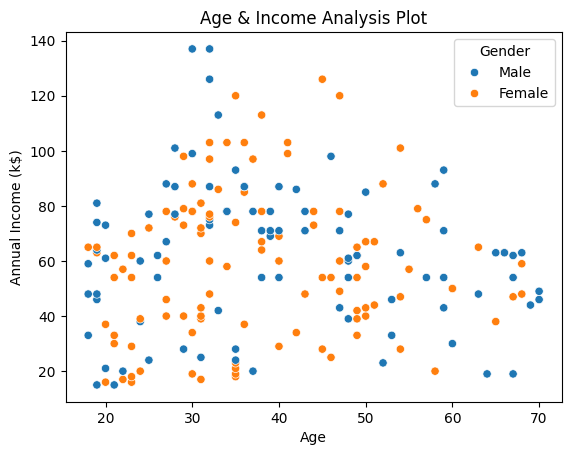

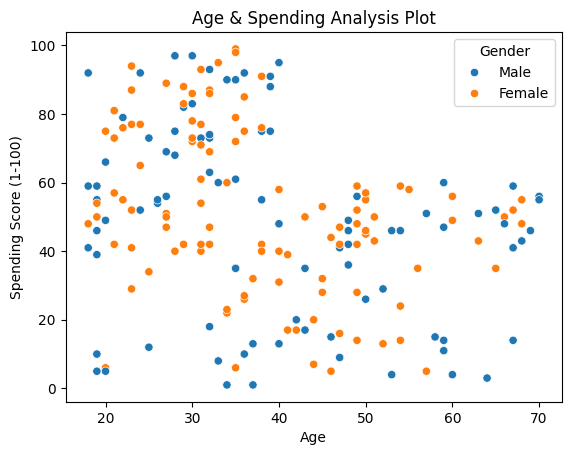

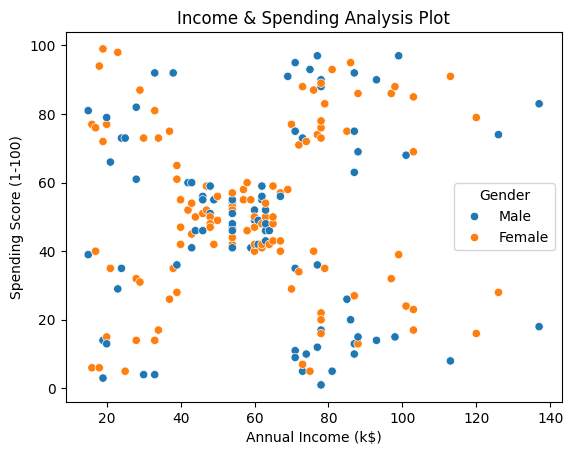

In [11]:
# Analyzing with pairs of columns:

sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender')
plt.title('Age & Income Analysis Plot')
plt.show()

sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender')
plt.title('Age & Spending Analysis Plot')
plt.show()

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title('Income & Spending Analysis Plot')
plt.show()

In [12]:
new_df = df.drop(columns=['CustomerID'])
print(new_df)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74
198    Male   32                 137                      18
199    Male   30                 137                      83

[200 rows x 4 columns]


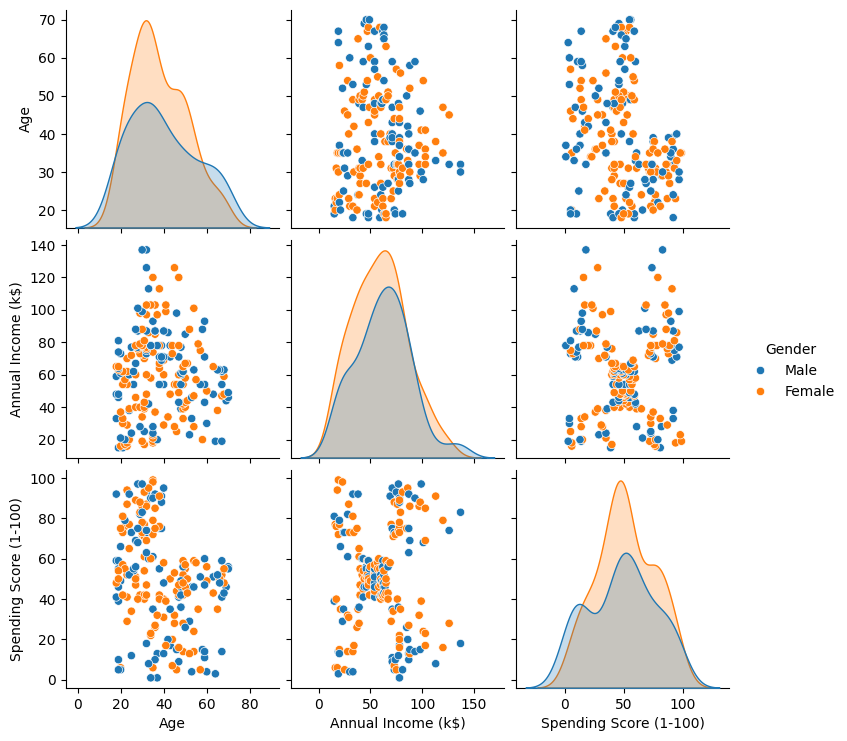

In [13]:
# Let's analyze multiple variables and their correlation with respect to Gender
sns.pairplot(new_df, hue='Gender')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

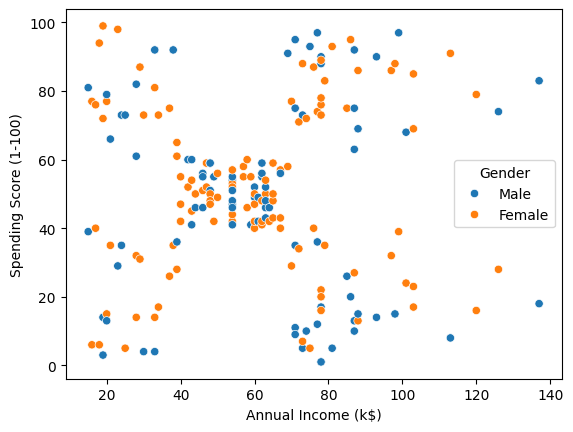

In [14]:
# Let's go to deeper analysis between Annual Income and Spending Score
# This analysis shows how people(specifically female or male) spend

sns.scatterplot(data=new_df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')

In [15]:
# Let's now look at the mean values grouping by Gender
grouped_df = new_df.groupby(['Gender'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(3)
print(grouped_df)

           Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                    
Female  38.098              59.250                  51.527
Male    39.807              62.227                  48.511


## Multivariate Analysis

In [80]:
new_df.drop(columns=['Gender']).corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

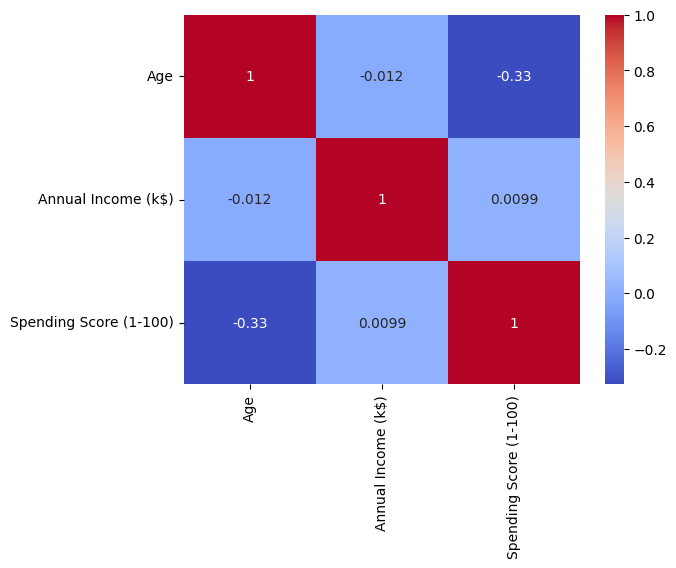

In [17]:
sns.heatmap(new_df.drop(columns=['Gender']).corr(), annot=True, cmap='coolwarm')

<Axes: >

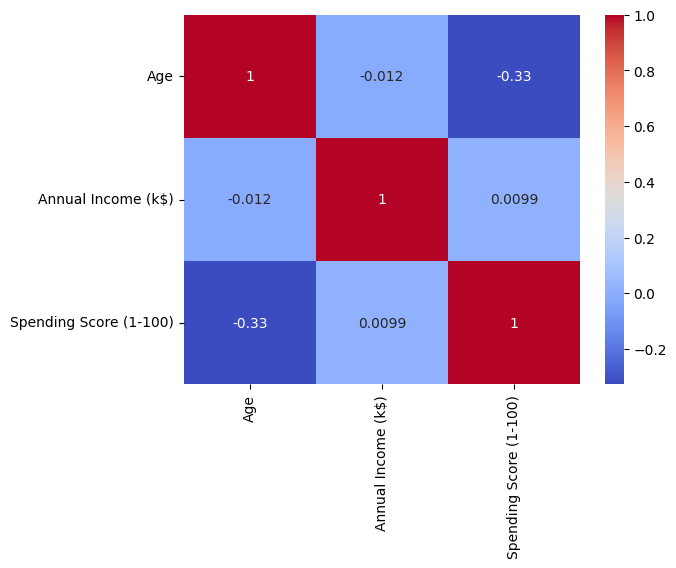

In [18]:
sns.heatmap(new_df.drop(columns=['Gender']).corr(), annot=True, cmap='coolwarm')

#### From the above correlation, we understand few points:
##### *1. Targeting Age groups: if we look at age then it has a moderate negative correlation with spending score (-0.327227), which means as age increases, the spending score decreses. In the other words, the younger customers tend to have higher spending scores compare to older customers. Because of this insight, marketing team can focus more target on younger demographics.*

##### *2. Income & Spending Analysis : There is almost no correlation between annual income & spending behavior at the mall doesn't significantly depend on their income level.*

##### *3. Age & Income Analysis: Similarly here also it has a weak correlation between age & annual income. This again indicates that there is almost no linear relationship between these two variables.*

## PCA ANALYSIS

#### Analyzing between Bivariate "Annual Income (k$) & Spending Score (1-100)"

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
# Standardize the data first
scaled_df = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaled_df = StandardScaler().fit_transform(scaled_df)
print(scaled_df)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [21]:
#Applying PCA
x = PCA(n_components=2)
pca = x.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=pca, columns=['PC1', 'PC2'])

# Adding Gender column back to PCA data
pca_df = pd.concat([pca_df, df[['Gender']]], axis=1)
pca_df.head()

,PC1,PC2,Gender
0,-1.537109,-0.922207,Male
1,-0.384168,-2.075149,Male
2,-2.416002,0.010665,Female
3,-0.466982,-1.938355,Female
4,-1.455678,-0.895678,Female


In [22]:
# Amount of variance each PC explains
explained_variance = x.explained_variance_ratio_
print(f"Explained Variance (PC1): {explained_variance[0]:.2f}")
print(f"Explained Variance (PC2): {explained_variance[1]:.2f}")


Explained Variance (PC1): 0.50
Explained Variance (PC2): 0.50


C:\Users\yousuf\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\yousuf\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\yousuf\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yousuf\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\yousuf\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

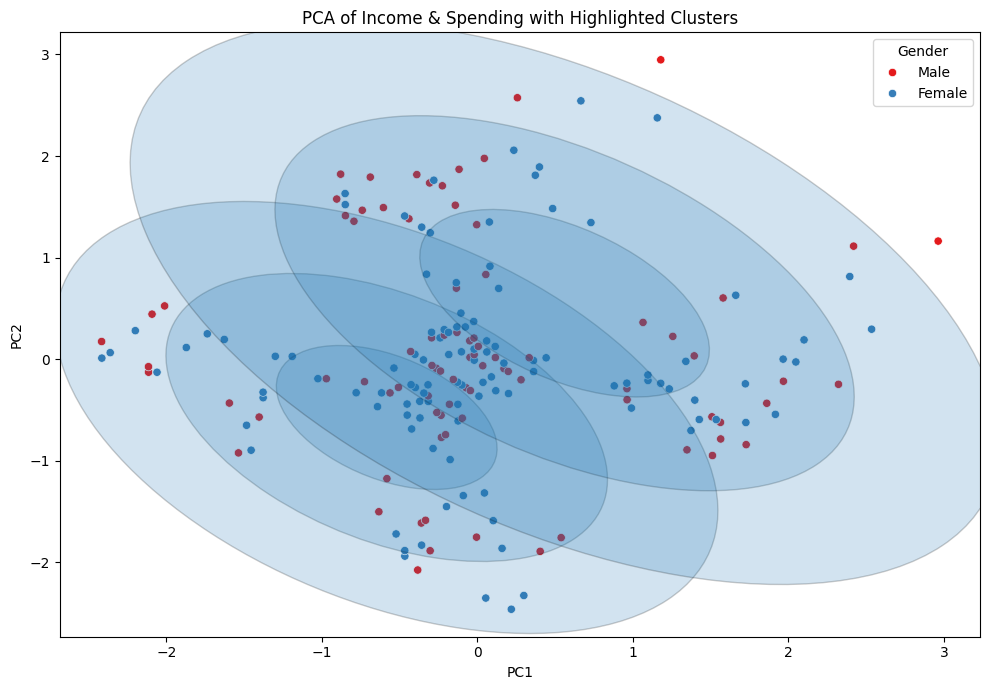

In [23]:
import matplotlib.patches as mpatches

# Plotting PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Gender', palette='Set1')

# Draw ellipses around clusters
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ellipse = mpatches.Ellipse(xy=position, width=nsig * width, height=nsig * height,
                                   angle=angle, **kwargs)
        ax.add_patch(ellipse)

# Here we use dummy clusters for demonstration
kmeans = KMeans(n_clusters=2)
pca_df['Cluster'] = kmeans.fit_predict(pca)

# Plot ellipses for each cluster
for cluster in np.unique(pca_df['Cluster']):
    cluster_points = pca_df[pca_df['Cluster'] == cluster]
    covariance = np.cov(cluster_points[['PC1', 'PC2']].values.T)
    mean = cluster_points[['PC1', 'PC2']].mean(axis=0).values
    draw_ellipse(mean, covariance, alpha=0.2, edgecolor='k')

plt.title('PCA of Income & Spending with Highlighted Clusters')
plt.tight_layout()
plt.savefig('PCA of Income & Spending with Highlighted Clusters.jpg')
plt.show()


C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Wi

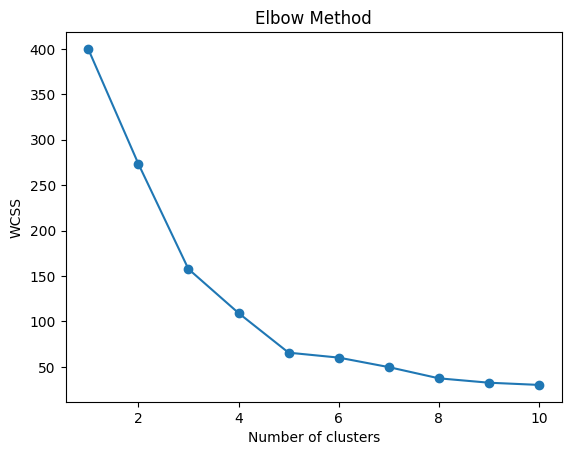

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df[['PC1', 'PC2']])
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


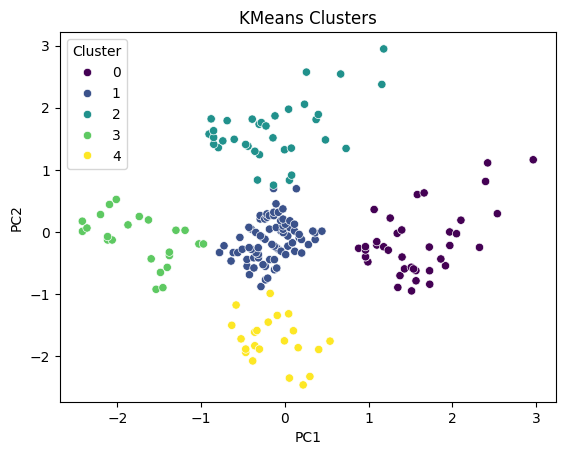

In [25]:
# Fit KMeans with optimal clusters (assume k=5 from Elbow method)
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Add cluster labels to the data
pca_df['Cluster'] = clusters

# Visualize the clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=pca_df)
plt.title('KMeans Clusters')
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
sil_score = silhouette_score(pca_df[['PC1', 'PC2']], clusters)
print(f'Silhouette Score: {sil_score}')


Silhouette Score: 0.5539423799423155


# Clustering : Univariate, Bivariate & Multivariate

## Univariate Clustering: Clustering customers based on their annual income helps identify distinct groups of customers with similar income levels. This can be useful for targeted marketing strategies. 

#### *Creating  KMeans clustering model with 6 clusters and fit it to the univariate variable ['Annual Income'] data. This calculates the centroids and assigns each point to the nearest centroid.*

In [27]:
univariate_clustering = KMeans(n_clusters = 3)

In [28]:
univariate_clustering.fit(df[['Annual Income (k$)']])

C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [29]:
univariate_clustering.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [30]:
# Assigning Cluster Labels to new column
df['Income Clusters'] = univariate_clustering.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [31]:
# Let's count the number of data ponits in each cluster
df['Income Clusters'].value_counts()

Income Clusters
1    92
0    86
2    22
Name: count, dtype: int64

####  *The inertia of clustering model measures how well the data points are clustered, with lower values representing better clustering.*

In [32]:
# Accessing the inertia
inertia_univariate = univariate_clustering.inertia_
print(f'Inertia: {inertia_univariate}')

Inertia: 25341.285871863227


In [33]:
# Calculate the inertia for different number of clusters
inertia_univariate_values = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans= KMeans(n_clusters=k)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_univariate_values.append(kmeans.inertia_)
print(inertia_univariate_values)

[137277.28, 49761.73701298701, 25640.457784396836, 14647.235170393065, 8481.496190476191, 5081.48466026727, 3931.9880952380954, 2876.6733211233213, 2493.503968253968, 2008.1457431457434]


C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Wi

##### *Elbow Method: A technique to determine the optimal number of clusters. It involves plotting inertia against the number of clusters and looking for an "elbow" point where the rate of decrease in inertia slows down.*

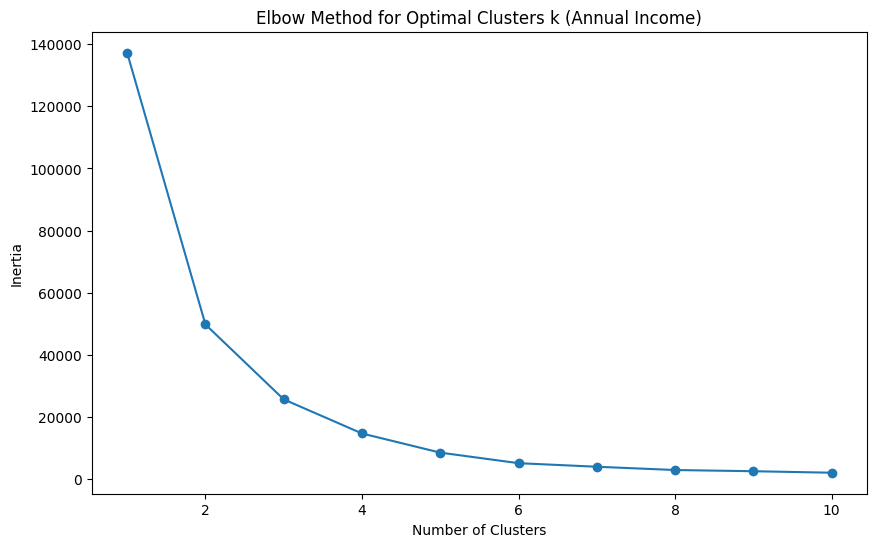

In [34]:
# Plot the inertia values
plt.figure(figsize = (10, 6))
plt.plot(cluster_range, inertia_univariate_values, marker='o')
plt.title('Elbow Method for Optimal Clusters k (Annual Income)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#### *The elbow method in the plot indicates the point where adding more clusters doesn't significantly decrese inertia, suggesting an optimal number of clusters. So by looking at the plot we determing number of clusters to be set 3*

In [35]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Clusters'],
      dtype='object')

In [36]:
# Grouping the 'Income Clustering' and calculates the mean values for each cluster
df.groupby('Income Clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Income Clusters,,,
0,40.02,36.35,50.08
1,38.07,71.80,49.88
2,37.55,108.18,52.00


##### *This way it helps to understand how different customer groups (clusters) vary based on their 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)', providing valuable insights for targeted marketing strategies.*

## ANALYSIS:

##### *Cluster 0:*
* Age: 	38.93
* Annual Income (k$)	: 	33.03
* Spending Score (1-100): 	50.17
  
##### *Interpretation:*
This cluster represents customers with relatively lower annual income (around $ 33k) and a middle age range around 39 years old. Their average spending score is around 50 points.

##### *Marketing Statergy:*
This group might respond well to value oriented promotions, loyalty programs, and targeted discounts on essential or popular items.

##### *Cluster 1:*
* Age: 	39.18	
* Annual Income (k$)	: 	66.72
* Spending Score (1-100): 	50.05
  
##### *Interpretation:*
This cluster represents customers with moderate annual income (around $ 67k) and a similar age range around 39 years old. Their average spending score is also around 50 points.

##### *Marketing Statergy:*
This group may be targeted with promotions that iffer better value for their money, bundling products, or providing added services that enhance the shopping experience.

##### *Cluster 2:*
* Age: 	37.83	
* Annual Income (k$)	: 	99.89
* Spending Score (1-100): 	50.64
  
##### *Interpretation:*
This cluster represents customers with higher annual income (around $ 100k) and slightly younger age below 38 years old. Their average spending score is nearly 51 points.

##### *Marketing Statergy:*
This group might be interested in premium products, exclusive offers, and personalized shopping experiences. They can be targeted with high-end promotions, luxury goods, and personalized services.

##### *Target Age Groups:* 
All clusters have similar mean ages, suggesting that the marketing strategies might not need to vary significantly by age. However, tailoring messages slightly towards mature customers (late 30s to early 40s) may be effective.

##### *Income-Based Segmentation:*
Lower-income customers (Cluster 0) could be attracted with budget-friendly options and promotions.
Middle-income customers (Cluster 1) may appreciate a balance of value and quality.
Higher-income customers (Cluster 2) can be targeted with luxury and exclusive offers.

##### *Spending Behavior:*
Since the spending scores are around average for all clusters, it suggests a balanced approach where promotions can be tailored to gradually increase spending across all groups. For example, loyalty programs that offer rewards for increased spending could be beneficial.

## Bivariate Clustering: 

In [37]:
# Setting the clusters to 5 as PCA 
bivariate_clustering = KMeans(n_clusters=5)
bivariate_clustering.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

# Assigning Cluster Labels to new column
df['Income & Spending Clusters'] = bivariate_clustering.labels_
df.head()

C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income & Spending Clusters
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1


In [38]:
# Calculate the inertia for different number of clusters
inertia_values2 = []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans2 = KMeans(n_clusters=k)
    kmeans2.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
    inertia_values2.append(kmeans2.inertia_)
print(inertia_values2)

[269981.28, 181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 40845.0821432953, 30227.606513152015, 28081.012638188364, 23418.71242463184, 19994.409069463563]


C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Wi

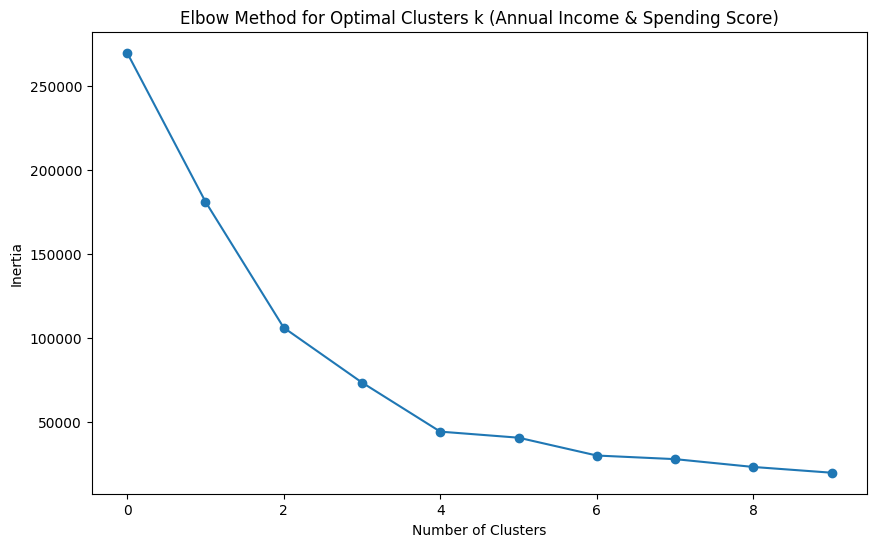

In [39]:
# Plot the inertia values
plt.figure(figsize = (10, 6))
plt.plot(inertia_values2, marker='o')
plt.title('Elbow Method for Optimal Clusters k (Annual Income & Spending Score)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [40]:
# Extract cluster centers
cluster_centers = bivariate_clustering.cluster_centers_

# Creating dataframe for cluster center points
centers_df = pd.DataFrame(cluster_centers, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
centers_df.columns = ['x', 'y']
centers_df.head()

,x,y
0,86.538462,82.128205
1,26.304348,20.913043
2,88.200000,17.114286
3,55.296296,49.518519
4,25.727273,79.363636


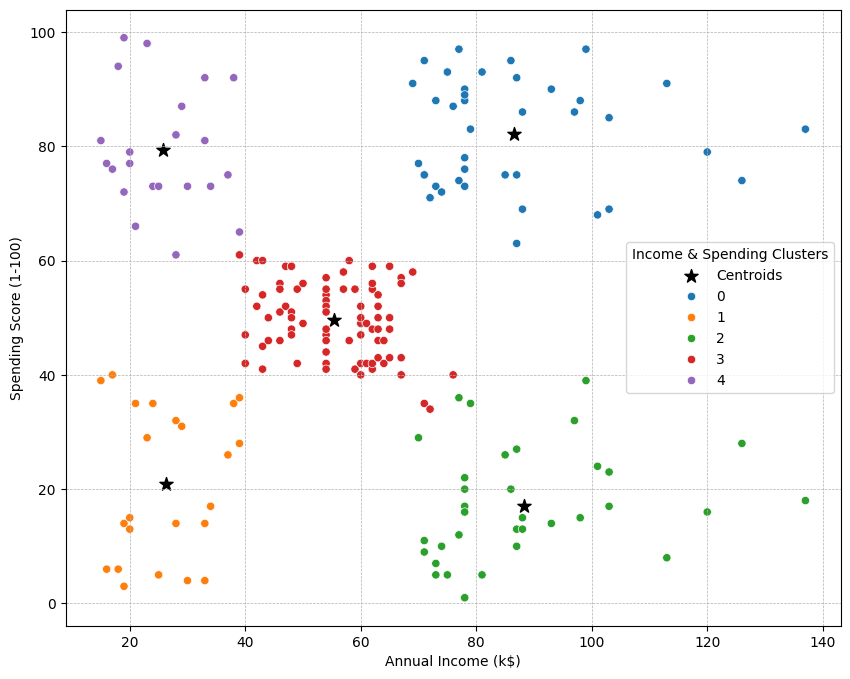

In [76]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers_df['x'], y=centers_df['y'], s=100, color='black', marker='*', label='Centroids')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Income & Spending Clusters', palette='tab10')
# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('Clustered_Segmented_Bivariate_Analysis.png')

In [42]:
pd.crosstab(df['Income & Spending Clusters'], df['Gender'], normalize='index')

Gender,Female,Male
Income & Spending Clusters,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.457143,0.542857
3,0.592593,0.407407
4,0.590909,0.409091


In [43]:
# Grouping the 'Income & Spending Clustering' and calculates the mean values for each cluster
df.groupby('Income & Spending Clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
Income & Spending Clusters,,,
0,32.69,86.54,82.13
1,45.22,26.30,20.91
2,41.11,88.20,17.11
3,42.72,55.30,49.52
4,25.27,25.73,79.36


#### The insights from the clustering analysis grouped by 'Income & Spending Clusters' can provide valuable information for the marketing team. Here is a detailed analysis of each cluster based on the mean values for 'Age', 'Annual Income (k$)', and 'Spending Score (1-100)':

##### Insights for Each Cluster:

##### *Cluster 0:*

Average Age: 41.11
Annual Income (k$): 88.20
Spending Score (1-100): 17.11
Insights:

This cluster represents older customers with high annual income but low spending scores.
These customers might be more financially secure but less inclined to spend on discretionary items.
Marketing Strategy: Target this group with promotions for premium products, luxury items, or high-quality goods that justify their spending.

##### *Cluster 1:*

Average Age: 25.27
Annual Income (k$): 25.73
Spending Score (1-100): 79.36
Insights:

This cluster consists of younger customers with lower annual incomes but high spending scores.
These customers are likely to spend a significant portion of their income on shopping.
Marketing Strategy: Focus on affordable yet trendy products, discounts, and loyalty programs to retain these high-spending young customers.

##### *Cluster 2:*

Average Age: 42.72
Annual Income (k$): 55.30
Spending Score (1-100): 49.52
Insights:

This cluster includes middle-aged customers with moderate annual incomes and spending scores.
They represent a balanced spending behavior.
Marketing Strategy: Offer value-for-money products, moderate discounts, and quality service to attract and retain this balanced spending group.

##### *Cluster 3:*

Average Age: 32.69
Annual Income (k$): 86.54
Spending Score (1-100): 82.13
Insights:

This cluster represents relatively young customers with high annual income and high spending scores.
They are the most valuable customers due to their high spending potential.
Marketing Strategy: Prioritize this segment with exclusive offers, personalized marketing, premium product launches, and VIP customer experiences to maximize their spending and loyalty.

##### *Cluster 4:*

Average Age: 45.22
Annual Income (k$): 26.30
Spending Score (1-100): 20.91
Insights:

This cluster comprises older customers with low annual income and low spending scores.
These customers are less likely to spend significantly at the mall.
Marketing Strategy: Focus on essential and budget-friendly products, basic promotions, and cost-effective marketing strategies to appeal to this price-sensitive segment.


#### *Overall Insights:*

*The marketing team can use these insights to tailor their strategies to different customer segments, optimizing their campaigns to increase engagement and sales.*

##### *High-income clusters with high spending scores (Cluster 3) should be targeted for premium and exclusive offers.*

#####  *Younger, high-spending but low-income clusters (Cluster 1) can be attracted with affordable pricing and trendy products.*

#####  *Balanced spenders (Cluster 2) can be targeted with value-for-money offers.*

#####  *Older, low-income, low-spending clusters (Cluster 4) might need more basic and essential product offerings.*

#####  *Older, high-income but low-spending clusters (Cluster 0) might appreciate premium quality over quantity.*

## MultiVariate Clustering:

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scale = StandardScaler()

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income & Spending Clusters
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,4
2,3,Female,20,16,6,0,1
3,4,Female,23,16,77,0,4
4,5,Female,31,17,40,0,1


In [56]:
# Let's transform the 'Gender' values into numerical values using one hot encoding
df1 = pd.get_dummies(df, columns=['Gender'], dtype=int)
df1.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income & Spending Clusters,Gender_Female,Gender_Male
0,1,19,15,39,0,1,0,1
1,2,21,15,81,0,4,0,1
2,3,20,16,6,0,1,1,0
3,4,23,16,77,0,4,1,0
4,5,31,17,40,0,1,1,0
5,6,22,17,76,0,4,1,0
6,7,35,18,6,0,1,1,0
7,8,23,18,94,0,4,1,0
8,9,64,19,3,0,1,0,1
9,10,30,19,72,0,4,1,0


In [57]:
df1.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Clusters', 'Income & Spending Clusters', 'Gender_Female',
       'Gender_Male'],
      dtype='object')

In [58]:
df2 = df1.drop(columns=['Gender_Male'])

In [59]:
df2.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Clusters', 'Income & Spending Clusters', 'Gender_Female'],
      dtype='object')

In [60]:
df2 = df2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female']]
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [61]:
# Now scaling the dataframe
df3 = pd.DataFrame(scale.fit_transform(df2))
df3.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,-1.128152
1,-1.281035,-1.738999,1.195704,-1.128152
2,-1.352802,-1.700830,-1.715913,0.886405
3,-1.137502,-1.700830,1.040418,0.886405
4,-0.563369,-1.662660,-0.395980,0.886405


In [62]:
# Calculate the inertia for different number of clusters
inertia_values3= []
cluster_range = range(1, 11)
for k in cluster_range:
    kmeans3 = KMeans(n_clusters=k)
    kmeans3.fit(df2)
    inertia_values3.append(kmeans3.inertia_)
print(inertia_values3)

[308862.05999999994, 221136.44188596494, 143391.5923603568, 105299.98742210325, 75412.59682443162, 76396.41777073094, 54620.66590794365, 47868.19829736155, 42730.87039872408, 39293.87703694156]


C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Wi

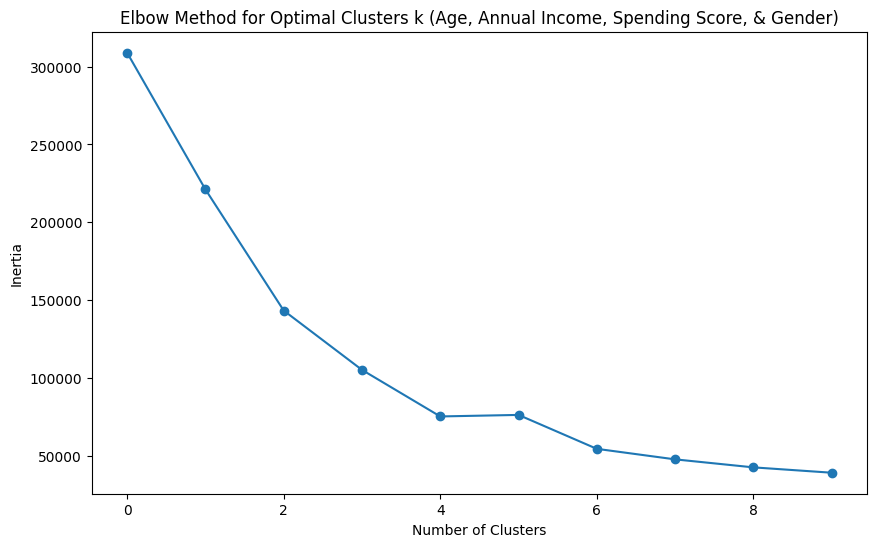

In [63]:
# Plot the inertia values
plt.figure(figsize = (10, 6))
plt.plot(inertia_values3, marker='o')
plt.title('Elbow Method for Optimal Clusters k (Age, Annual Income, Spending Score, & Gender)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [121]:
# Setting the clusters to 5 as PCA 
multivariate_clustering = KMeans(n_clusters=4)
multivariate_clustering.fit(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Assigning Cluster Labels to new column
df2['Age, Income & Spending Clusters'] = multivariate_clustering.labels_
df2.head()

C:\Users\yousuf\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,"Age, Income & Spending Clusters"
0,19,15,39,0,3
1,21,15,81,0,3
2,20,16,6,1,1
3,23,16,77,1,3
4,31,17,40,1,1


In [122]:
cluster_centers = multivariate_clustering.cluster_centers_
print(cluster_centers)

[[40.39473684 87.         18.63157895]
 [44.89473684 48.70526316 42.63157895]
 [32.69230769 86.53846154 82.12820513]
 [24.82142857 28.71428571 74.25      ]]


In [123]:
# Assuming you have the column names for your features
cluster_center_df = pd.DataFrame(cluster_centers, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print(cluster_center_df)


         Age  Annual Income (k$)  Spending Score (1-100)
0  40.394737           87.000000               18.631579
1  44.894737           48.705263               42.631579
2  32.692308           86.538462               82.128205
3  24.821429           28.714286               74.250000


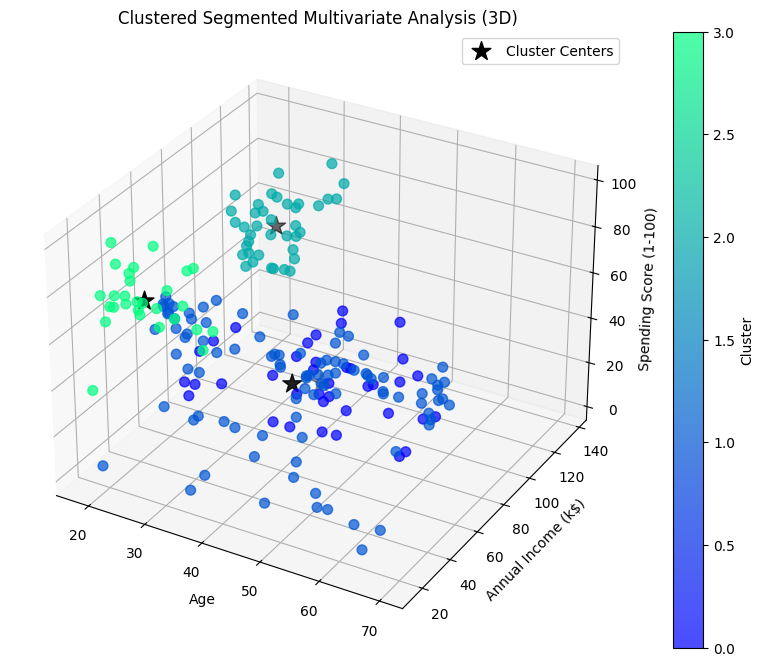

In [124]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the data points, colored by cluster
scatter = ax.scatter(df2['Age'], df2['Annual Income (k$)'], df2['Spending Score (1-100)'], c=df2['Age, Income & Spending Clusters'], cmap='winter', s=50, alpha=0.7)

# Plot cluster centers
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='black', marker='*', s=200, label='Cluster Centers')

ax.set_title('Clustered Segmented Multivariate Analysis (3D)')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.legend()
fig.colorbar(scatter, ax=ax, label='Cluster')

# Save the plot
plt.savefig('clustered_multivariate_analysis_3d.png')

plt.show()

In [103]:
pd.crosstab(df2['Age, Income & Spending Clusters'], df2['Gender_Female'], normalize='index')

Gender_Female,0,1
"Age, Income & Spending Clusters",,
0,0.526316,0.473684
1,0.378947,0.621053
2,0.461538,0.538462
3,0.500000,0.500000


In [105]:
# Grouping the 'Income & Spending Clustering' and calculates the mean values for each cluster
df2.groupby('Age, Income & Spending Clusters')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(2)

,Age,Annual Income (k$),Spending Score (1-100)
"Age, Income & Spending Clusters",,,
0,40.39,87.00,18.63
1,44.89,48.71,42.63
2,32.69,86.54,82.13
3,24.82,28.71,74.25


In [137]:
df2.columns

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female',
       'Age, Income & Spending Clusters'],
      dtype='object')

In [138]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Clusters',
       'Income & Spending Clusters', 'Age, Income & Spending Clusters'],
      dtype='object')


In [139]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Income & Spending Clusters,"Age, Income & Spending Clusters"
0,1,Male,19,15,39,0,1,3
1,2,Male,21,15,81,0,4,3
2,3,Female,20,16,6,0,1,1
3,4,Female,23,16,77,0,4,3
4,5,Female,31,17,40,0,1,1


In [140]:
df.to_csv('Clustered_MallCustomerSegmentation_Data.csv')